<img src="images/logodwengo.png" alt="Banner" width="150"/>

<div>
    <font color=#690027 markdown="1">
        <h1>Statistiek in Python 4: De normale verdeling</h1> 
    </font>
</div>

In [1]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div>
    <font color=#690027 markdown="1">
        <h2>1. De normale verdeling in Python</h2> 
    </font>
</div>

De **normale verdeling** of **Gaussiaanse verdeling** is een functie die zijn nut heeft in de simulatie van bepaalde soorten datasets, zoals binnenkort zal worden geïllustreerd. Het functievoorschrift van de normale verdeling wordt gegeven door:

$Norm(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\frac{{x-\mu}^2}{\sigma^2}}$

Omdat het voorschrift vrij ingewikkeld is wordt hier de afkorting *Norm* gebruikt. $\mu$ en $\sigma$ zijn parameters die we het **gemiddelde** en de **standaardafwijking** van de normale verdeling gaan noemen.

De normale verdeling kan in Python opgeroepen worden via de `norm.pdf` functie uit de module `scipy.stats`. Onderstaande code tekent een grafiek van een normale verdeling. 

<div class="alert alert-block alert-info"> 
"pdf" staat voor "probability density function". Dat is de Engelse term voor een <b>kansdichtheidsfunctie</b>. Een kansdichtheidsfunctie is een weergave van hoe hoog de kans is dat een stochastische variabele in de buurt van een bepaalde waarde voorkomt. De normale verdeling is een soort van kansverdelingsfunctie, waarbij de kans het hoogste is als een waarde rond het gemiddelde zal liggen.
</div>

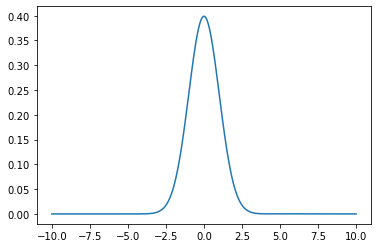

In [2]:
gemiddelde = 0
standaardafwijking = 1
x = np.linspace(10,-10,1001)  # Bepaal de x-waarden om de grafiek op te tekenen
y = norm.pdf(x, gemiddelde, standaardafwijking)  # Bepaal de functiewaarden van een normale verdeling met gegeven gemiddelde en standaardafwijking
plt.plot(x,y)  # Teken de grafiek van de normale verdeling

### Opdracht 1.1

Wanneer het gemiddelde 0 is en de standaardafwijking 1 spreken we van de **standaardnormale verdeling**. Pas hierboven de parameters `gemiddelde` en `standaardafwijking` van de normale verdeling aan en beantwoord de onderstaande vragen.

Wat gebeurt er met de grafiek als je het gemiddelde aanpast naar een positief getal?

Antwoord: Translatie naar rechts.

Kan het gemiddelde ook negatief zijn? Zo ja, welk effect heeft dit op de grafiek?

Antwoord: Ja. Translatie naar links.

Hoe kan je het gemiddelde aflezen in de grafiek?

Antwoord: De x-waarde van het maximum van de grafiek bepaald het gemiddelde.

Wat gebeurt er als je de standaardafwijking aanpast naar een getal groter dan 1?

Antwoord: De grafiek wordt breder, maar minder hoog rond het gemiddelde.

Wat gebeurt er als je de standaardafwijking aanpast naar een getal kleiner dan 1?

Antwoord: De grafiek wordt smaller, en hoger rond het gemiddelde.

Kan de standaardafwijking ook negatief zijn? Zo ja, welk effect heeft dit op de grafiek?

Antwoord: Nee

We kunnen ook de **cumulatieve dichtheidsfunctie** van de normale verdeling opvragen via de functie `norm.cdf`. Onderstaande code tekent de cumulatieve dichtheidsfunctie over de kansdichtheidsfunctie.

<div class="alert alert-block alert-info"> 
Analoog staat "cdf" voor "cumulative density function". Dat is de Engelse term voor een cumulatieve dichtheidsfunctie. Dat is een andere weergave van een verdeling met als eigenschap dat de kans dat een stochastische variabele kleiner is dan een bepaalde waarde kan worden berekend door de cumulatieve dichtheidsfunctie toe te passen op die waarde. Met andere woorden:
    <math display="block">
        P[X < a] = cdf_X(a)
    </math> 
</div>

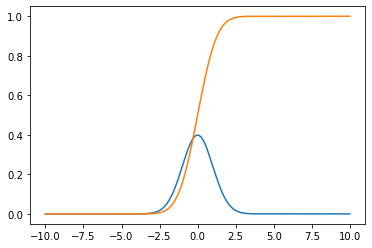

In [3]:
gemiddelde = 0
standaardafwijking = 1
x = np.linspace(10,-10,1001)
y_pdf = norm.pdf(x, gemiddelde, standaardafwijking)  # Pas de dichtheidsfunctie van de normale verdeling toe op een reeks x-waarden
y_cdf = norm.cdf(x, gemiddelde, standaardafwijking)  # Pas de cumulatieve dichtheidsfunctie van de normale verdeling toe op een reeks x-waarden
plt.plot(x,y_pdf)   # Teken de grafiek van de dichtheidsfunctie
plt.plot(x,y_cdf)   # Teken de grafiek van de cumulatieve dichtheidsfunctie

<div>
    <font color=#690027 markdown="1">
        <h2>2. De normale verdeling als benadering</h2> 
    </font>
</div>

De normale verdeling kan in veel gevallen gebruikt worden als een goede benadering van een de verdeling van de data in een dataset. Rekenen met de normale verdeling bespaart ons typisch veel rekenwerk tegenover een exacte berekening te doen op datastets die vaak miljoenen waarden bevatten. 

Beschouw de dataset op locatie `data/weather_in_Antwerp.csv` die metingen bevat voor over het weer in Antwerpen op verschillende tijdstippen. We willen graag weten wat de kans is dat de luchtdruk lager ligt dan 1 bar (1000 mbar). We proberen dit op 2 manieren: zonder en met de normale verdeling.
* Bron: https://www.kaggle.com/datasets/ramima/weather-dataset-in-antwerp-belgium

### Opdracht 2.1

Laad de dataset in en teken een duidelijk histogram van de relatieve frequenties van de luchtdruk (`barometer`).

<AxesSubplot:ylabel='Frequency'>

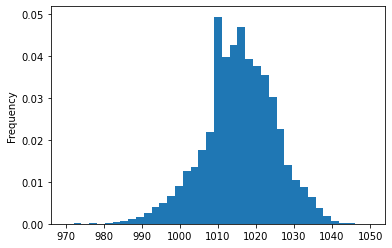

In [4]:
weather = pd.read_csv("data/weather_in_Antwerp_2012to2016.csv")
x=np.linspace(970,1050,40)
weather['barometer'].plot(kind='hist',bins=x, density=True)

Maak een nieuwe kolom die alle waarden uit `barometer` bevat die kleiner zijn dan 1 bar. 

<div class="alert alert-block alert-warning"> 
Herinner je dat we in <i>Statistiek in Python 3: Data analyseren</i> slicing hebben gebruik om waarden uit een kolom te filteren.
</div>

In [5]:
barometer = weather['barometer']
barometer_lager1bar = barometer[barometer < 1000]

Bereken de lengte van de gefilterde kolom en deel die door het totaal aantal rijen.

In [6]:
len(barometer_lager1bar)/len(weather)

0.05508883566296071

We bekomen nu een goede benadering van de kans dat de luchtdruk in Antwerpen lager is dan 1 bar. Waarom spreken we hier van een benadering?

Antwoord: De kans is gebaseerd op een eindig aantal metingen.

Hoe kunnen we ervoor zorgen dat deze benadering nauwkeuriger wordt?

Antwoord: Meer elementen aan de dataset toevoegen.

Maak via het histogram een schatting van de gemiddelde en standaardafwijking van de luchhtdruk.

Antwoord: Gemiddelde, ongeveer 1020 mbar (maximum van het histogram). Standaardafwijking, ongeveer 10 mbar (afstand tussen gemiddelde en buigpunt)

### Opdracht 2.2

We berekenen nu dezelfde kans opnieuw door de data te benaderen door een normale verdeling. 

Bereken de exacte gemiddelde luchtdruk met Python. Bereken ook de standaardafwijking van de luchtdruk. Die kan je berekenen met de functie `std` (van het Engelse standard deviation), analoog aan de `mean` functie. Sla de resultaten op in de variabelen `barometer_gemiddelde` en `barometer_standaardafwijking`.

<div class="alert alert-block alert-warning"> 
Kijk nog eens terug naar het notebook <i>Statistiek in Python 3: Data analyseren</i> als je niet meer weet hoe je het gemiddelde van een kolom moet berekenen.
</div>

In [7]:
barometer_gemiddelde = weather['barometer'].mean()
barometer_standaardafwijking = weather['barometer'].std()

We kunnen deze gemiddelde en standaardafwijking gebruiken als parameters voor een normale verdeling. Onderstaande code toont deze normale verdeling bovenop het histogram. Hieraan zien we dat de luchtdruk inderdaad bij benadering normaal verdeeld is.

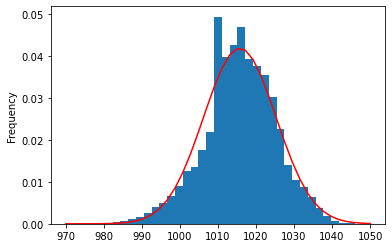

In [8]:
x = np.linspace(970,1050,40)
y = norm.pdf(x,barometer_gemiddelde,barometer_standaardafwijking)  # Bereken de waarden voor de dichtheidsfunctie van normale verdeling
weather['barometer'].plot(kind='hist',bins=x, density=True)  # Teken het histogram
plt.plot(x,y,color='red')  # Teken de dichtheidsfunctie van normale verdeling

Om makkelijk de kans te berekenen dat een variabele uit een normale verdeling kleiner is dan 1000, gebruik je de cumulatieve dichtheidsfunctie. 

In [9]:
norm.cdf(1000,barometer_gemiddelde,barometer_standaardafwijking)

0.049672356318829575

Hoeveel verschillen de resultaten beide methoden?

Antwoord: 0.00542

Wat zou hier de reden voor kunnen zijn?

Antwoord: De normale verdeling is een model. In de realiteit zullen de gegevens nooit exact overeen komen met een normale verdeling.

### Opdracht 2.3

Gebruik de normale verdeling om volgende kansen te berekenen:
* De kans dat de luchtdruk hoger is dan 1040 mbar
* De kans dat de luchtdruk tussen 1000 en 1010 mbar licht

In [10]:
print(1 - norm.cdf(1040,barometer_gemiddelde,barometer_standaardafwijking))
print(norm.cdf(1010,barometer_gemiddelde,barometer_standaardafwijking) - norm.cdf(1000,barometer_gemiddelde,barometer_standaardafwijking))

0.005508007599729803
0.22442033934227115


<div>
    <font color=#690027 markdown="1">
        <h2>3. Oefening</h2> 
    </font>
</div>

We zagen eerder dat we de nauwkeurigheid van de schatting van een kans uit een normale verdeling konden verhogen door meer data te verzamelen. Echter dit leidt niet altijd tot een schatting die beter overeenkomt met de realiteit. Dit wordt geillustreerd in de volgende opdrachten.

### Opdracht 3.1

De dataset uit de vorige voorbeelden bevat data van een weerstation dat per half uur een meting registreerde van 2012 tot 2016. Het weerstation wil de nauwkeurigheid van hun berekeningen verhogen door de metingen tot 2019 aan de dataset toe te voegen. Door een fout voegen ze echter enkel de maanden mei tot augustus toe. We kijken wat het effect is van deze fout op de schatting van de temperatuur.

Laad eerst de geupdate dataset op de locatie `data/weather_in_Antwerp_2012to2019.csv` in. Genereer een histogram van de temperatuur voor de dataset *weather_in_Antwerp_2012to2016* en voor *weather_in_Antwerp_2012to2019*. De temperatuur is gegeven in °C in de kolom `temp`.

<div class="alert alert-block alert-danger"> 
Splits de code voor beide histogrammen op in 2 cellen om te vermeiden dat ze overlappen.
</div>

<AxesSubplot:ylabel='Frequency'>

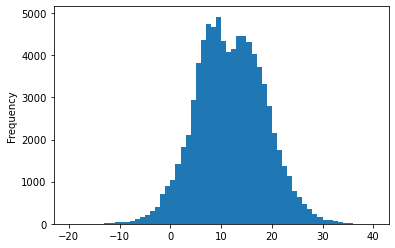

In [11]:
weather_2016 = pd.read_csv('data/weather_in_Antwerp_2012to2016.csv')
weather_2019 = pd.read_csv('data/weather_in_Antwerp_2012to2019.csv')

x = np.linspace(-20,40,61)
weather_2016['temp'].plot(kind='hist', bins=x)

<AxesSubplot:ylabel='Frequency'>

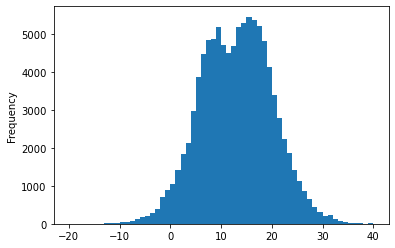

In [12]:
weather_2019['temp'].plot(kind='hist', bins=x)

Welke verschillen tussen de twee datasets kan je aflezen? Kijk in het speciaal naar het gemiddelde en de standaardafwijking.

Antwoord. De 2019 dataset heeft meer waarden op hoge temperaturen.

### Opdracht 3.2

Bereken het gemiddelde en de standaardafwijking van beide datasets. Sla ze op in de variabelen `temperatuur_gemiddelde_2016`, `temperatuur_gemiddelde_2019`, `temperatuur_standaardafwijking_2016` en `temperatuur_standaardafwijking_2019`.

In [13]:
temperatuur_gemiddelde_2016 = weather_2016['temp'].mean()
temperatuur_gemiddelde_2019 = weather_2019['temp'].mean()
temperatuur_standaardafwijking_2016 = weather_2016['temp'].std()
temperatuur_standaardafwijking_2019 = weather_2019['temp'].std()

Onderstaande code genereerd een grafiek van 2 normale verdelingen. De blauwe curve benaderd de dataset tot 2016 en de rode curve tot 2019.

<AxesSubplot:>

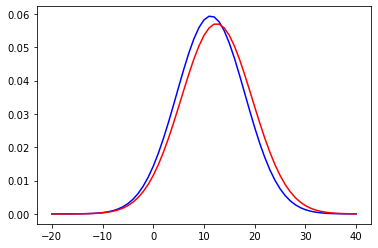

In [14]:
gauss = pd.DataFrame({
    '2016': norm.pdf(x,temperatuur_gemiddelde_2016,temperatuur_standaardafwijking_2016),
    '2019': norm.pdf(x,temperatuur_gemiddelde_2019,temperatuur_standaardafwijking_2019),
   }, index=x)
gauss['2016'].plot(kind='line',color='blue')
gauss['2019'].plot(kind='line',color='red')

Bereken de kans dat de temperatuur hoger is dan 30 °C. Gebruik eerst een normale verdeling op basis van de dataset tot 2016 om de kans te benaderen. Gebruik nadien de geüpdate dataset tot 2019.

In [15]:
kans_2016 = 1 - norm.cdf(30, temperatuur_gemiddelde_2016, temperatuur_standaardafwijking_2016)
kans_2019 = 1 - norm.cdf(30, temperatuur_gemiddelde_2019, temperatuur_standaardafwijking_2019)
print(kans_2016)
print(kans_2019)

0.002756566969911778
0.006166897611336486


De geschatte kans op een temperatuur hoger dan 30 °C zou een pak groter moeten zijn dan bij de foutief geüpdate dataset. Dat komt omdat de verdeling die we gebruikten om de kans te berekenen, niet overeenkomt met hoe de temperatuur in de realiteit is verdeeld. Denk bijvoorbeeld aan een extremer geval, mochten we enkel data uit de maand juli verzamelen, en daaruit conclusies maken over de temperatuur in Antwerpen over het hele jaar. Dit kan worden benoemd met verschillende termen zoals **selectief winkelen**, **selectieve bias** of **cherrypicking**.

Deze methode wordt zeer vaak, soms zelfs onbewust, gebruikt om resultaten te verdraaien. Denk maar aan klimaatontkenners die bijvoorbeeld meer wintermaanden in de dataset kunnen beschouwen en zo concluderen dat de Aarde niet opwarmt. Het is dus belangrijk om steeds de bron van de data uit een onderzoek te checken voor je zelf conclusies maakt.

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>

<b>Opmerking. Welke tekst moet hier terecht komen?

Notebook Python in wiskunde, zie Computationeel denken - Programmeren in Python van <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels, B. Van de Velde & N. Gesquière in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.